# Importing

In [1]:
%reload_ext autoreload
%autoreload 2
# The above two lines are often unnecessary but can be useful if importing code that you are actively editing.
# They make it so that any imported code that you edit is reloaded, so you don't have to restart the kernel or
# anything for changes to take effect when you use that code in the notebook.
from bolides.bdf import BolideDataFrame

# Making/saving a BolideDataFrame
## From [neo-bolide.ndc.nasa.gov](https://neo-bolide.ndc.nasa.gov)

In [2]:
bdf = BolideDataFrame(source='website')

## From pipeline output (advanced - can skip)

In [3]:
# bdf = BolideDataFrame(source='pipeline', files=['20220602_bolide_database_G16', '20220602_bolide_database_G17'])

## To and from serialized objects
Due to the (non-plain-text) nature of some of the data types that can occur in a BolideDataFrame, the best way to preserve all of the data structures when saving and loading is to serialize the data with `pickle`.
Note: only open pickled Python objects from people you trust! 

In [4]:
# saving:
bdf.to_pickle('bolide-data.pkl')
# loading:
bdf = BolideDataFrame(source='pickle', files='bolide-data.pkl')

## To and from csv
Since most of the data is plain-text, and some can be easily stored as plain text and restored into its original data type, `bolides` also supports saving and loading to csv files. Note that the data in some columns (e.g. those that contain a dict or light curves) will not be preserved. Saving to csv lets us look at the data in any spreadsheeting software.

In [5]:
# saving:
bdf.to_csv('bolide-data.csv')
# loading:
bdf = BolideDataFrame(source='csv', files='bolide-data.csv')

# Basic BolideDataFrame usage
The `BolideDataFrame` class can do anything that a Pandas [`DataFrame`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) can.
First we might want to get an idea of what's going on in our BolideDataFrame.

In [6]:
bdf.head()

_id  \
0  62a26e0c528bc34e889f9057   
1  62a26dab528bc34e889f83ee   
2  62a26d19528bc34e889f79c8   
3  62a261c8528bc34e889f64f4   
4  62a262f6528bc34e889f733d   

                                          brightness description  \
0  {'GLM-17': {'category': 'Faint', 'value': 3.38...               
1  {'GLM-16': {'category': 'Fairly Bright', 'valu...               
2  {'GLM-17': {'category': 'Faint', 'value': 5.48...               
3  {'GLM-16': {'category': 'Fairly Bright', 'valu...               
4  {'GLM-17': {'category': 'Fairly Bright', 'valu...               

      detectedBy                                        groundTrack  \
0         GLM-17  {'GLM-17': {'category': 'Multi-Pixel', 'value'...   
1  GLM-16,GLM-17  {'GLM-16': {'category': 'Single-Pixel', 'value...   
2         GLM-17  {'GLM-17': {'category': 'Single-Pixel', 'value...   
3  GLM-16,GLM-17  {'GLM-16': {'category': 'Single-Pixel', 'value...   
4         GLM-17  {'GLM-17': {'category': 'Multi-Pixel', 'value'...   

                                            howFound otherDetectingSources  \
0                             {'GLM-17': ['forest']}                         
1  {'GLM-16': ['tip off', 'stereo'], 'GLM-17': ['...                         
2                             {'GLM-17': ['forest']}                         
3       {'GLM-16': ['forest'], 'GLM-17': ['forest']}                         
4                             {'GLM-17': ['forest']}                         

  confidenceRating otherInformation lightcurveStructure  ...  \
0              low                              minimal  ...   
1           medium                              minimal  ...   
2              low                                 good  ...   
3           medium                              minimal  ...   
4           medium                            very good  ...   

                                                 csv       platform reason  \
0  ['/csv/62a26df3528bc34e889f8a15_OR_GLM-L2-LCFA...         GLM-17          
1  ['/csv/62a26d70528bc34e889f7e32_OR_GLM-L2-LCFA...  GLM-16,GLM-17          
2  ['/csv/62a26cff528bc34e889f75a2_OR_GLM-L2-LCFA...         GLM-17          
3  ['/csv/62a2618e528bc34e889f603c_OR_GLM-L2-LCFA...  GLM-16,GLM-17          
4  ['/csv/62a262d3528bc34e889f7200_OR_GLM-L2-LCFA...         GLM-17          

  rejectedBy rejectedDate                      geometry   source     phase  \
0                          POINT (-166.60000 -13.80000)  website  0.216715   
1                           POINT (-125.00000 45.40000)  website  0.207140   
2                           POINT (-141.00000 30.10000)  website  0.200250   
3                          POINT (-115.00000 -44.90000)  website  0.178236   
4                          POINT (-177.80000 -34.90000)  website  0.178115   

   moon_fullness  solarhour  
0       0.433430  10.584189  
1       0.414279   6.546876  
2       0.400499   0.579574  
3       0.356472  10.655072  
4       0.356229   6.381914  

[5 rows x 43 columns]

Looks like some columns in the middle are skipped when we do this… it would be good to know what columns are available.

In [7]:
bdf.columns

Index(['_id', 'brightness', 'description', 'detectedBy', 'groundTrack',
       'howFound', 'otherDetectingSources', 'confidenceRating',
       'otherInformation', 'lightcurveStructure', 'nearbyLightningActivity',
       'status', 'datetime', 'attachments', 'name', 'duration', 'latitude',
       'longitude', 'latitudeDelta', 'longitudeDelta', 'beginningAltitude',
       'lastModifiedBy', 'lastModifiedDate', 'enteredBy', 'enteredDate',
       'createdAt', 'updatedAt', '__v', 'submittedBy', 'submittedDate',
       'publishedBy', 'publishedDate', 'images', 'csv', 'platform', 'reason',
       'rejectedBy', 'rejectedDate', 'geometry', 'source', 'phase',
       'moon_fullness', 'solarhour'],
      dtype='object')

What sort of data does the "datetime" column contain?

In [8]:
bdf.datetime

0      2022-06-05 21:40:04
1      2022-06-05 14:51:23
2      2022-06-05 09:57:18
3      2022-06-04 18:17:43
4      2022-06-04 18:12:32
               ...        
3743   2017-10-08 08:01:06
3744   2017-10-01 12:43:52
3745   2017-09-05 05:11:25
3746   2017-07-31 22:01:34
3747   2017-07-23 06:12:36
Name: datetime, Length: 3748, dtype: datetime64[ns]

Note that, as well as accessing columns via `bdf.column` syntax, we can also access them like: `bdf['column']`

# Filtering

Pandas has a good tutorial on filtering (i.e. subsetting) data [here](https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/03_subset_data.html) but below are some examples that are relevant to bolides.

What if we only really want detections that were classified by the human as high-confidence? We can use boolean operators.

In [9]:
bdf.confidenceRating == 'high'

0       False
1       False
2       False
3       False
4       False
        ...  
3743     True
3744     True
3745     True
3746     True
3747     True
Name: confidenceRating, Length: 3748, dtype: bool

Now we have a list of Trues and Falses corresponding to our query. We can use this to index the BolideDataFrame

In [10]:
bdf[bdf.confidenceRating == 'high']

_id  \
7     629d4279e418fb2add5c6bf4   
16    629d230fe418fb2add5bacab   
24    629d0d93e418fb2add5ad4a7   
25    629d0b8ce418fb2add5ac351   
33    629ce3d0e418fb2add5a3f66   
...                        ...   
3743  5d0d4073bceaa433f0427cc9   
3744  5d0d3f34bceaa433f0425c04   
3745  5d0d3dd0bceaa433f0422b31   
3746  5d0d38b8bceaa433f0416637   
3747  5d0d3737bceaa433f040d8a5   

                                             brightness description  \
7     {'GLM-16': {'category': 'Fairly Bright', 'valu...               
16    {'GLM-16': {'category': 'Fairly Bright', 'valu...               
24    {'GLM-16': {'category': 'Fairly Bright', 'valu...               
25    {'GLM-16': {'category': 'Fairly Bright', 'valu...               
33    {'GLM-16': {'category': 'Bright', 'value': 7.5...               
...                                                 ...         ...   
3743  {'GLM-16': {'category': 'Faint', 'value': 9.10...               
3744  {'GLM-16': {'category': 'Fairly Bright', 'valu...               
3745  {'GLM-16': {'category': 'Bright', 'value': 4.2...               
3746  {'GLM-16': {'category': 'Bright', 'value': 4.8...               
3747  {'GLM-16': {'category': 'Bright', 'value': 1.5...               

         detectedBy                                        groundTrack  \
7            GLM-16  {'GLM-16': {'category': 'Multi-Pixel', 'value'...   
16    GLM-16,GLM-17  {'GLM-16': {'category': 'Multi-Pixel', 'value'...   
24    GLM-16,GLM-17  {'GLM-16': {'category': 'Multi-Pixel', 'value'...   
25    GLM-16,GLM-17  {'GLM-16': {'category': 'Multi-Pixel', 'value'...   
33           GLM-16  {'GLM-16': {'category': 'Multi-Pixel', 'value'...   
...             ...                                                ...   
3743         GLM-16                                                      
3744         GLM-16                                                      
3745         GLM-16                                                      
3746         GLM-16                                                      
3747         GLM-16                                                      

                                          howFound otherDetectingSources  \
7                           {'GLM-16': ['forest']}                         
16    {'GLM-16': ['forest'], 'GLM-17': ['forest']}                         
24    {'GLM-16': ['forest'], 'GLM-17': ['forest']}                         
25    {'GLM-16': ['forest'], 'GLM-17': ['forest']}                         
33                          {'GLM-16': ['forest']}                   USG   
...                                            ...                   ...   
3743    {'GLM-16': ['all-sky camera correlation']}               all-sky   
3744    {'GLM-16': ['all-sky camera correlation']}               all-sky   
3745   {'GLM-16': ['USG sensor data correlation']}          USG, all-sky   
3746   {'GLM-16': ['USG sensor data correlation']}                   USG   
3747   {'GLM-16': ['USG sensor data correlation']}                   USG   

     confidenceRating                                   otherInformation  \
7                high                                                      
16               high                                                      
24               high                                                      
25               high                                                      
33               high                                                      
...               ...                                                ...   
3743             high  GLM-16 was not operational at this time. The G...   
3744             high  GLM-16 was not operational at this time. The G...   
3745             high  GLM-16 was not operational at this time. The G...   
3746             high                                                      
3747             high  GLM-16 was not operational at this time. The G...   

     lightcurveStructure  ...  \
7              ve

We see that, in the "confidenceRating" column, the only value seems to be "high". But note that we didn't actually save this filtered BolideDataFrame. To do that, we need to assign it to a variable. In this case, we can just overwrite `bdf` as follows:

In [11]:
bdf = bdf[bdf.confidenceRating == 'high']

The same filtering syntax can be used with different lists of Trues and Falses like `bdf.latitude > 30` for bolides with a latitude greater than 30°N, `bdf.detectedBy.str.contains('GLM-16')`, for bolides detected by GLM-16, etc. Advanced users can use operators like `&` (AND), `|` (OR), and `~` (NOT) to combine different conditions. An example for (bolides detected by GLM-16 and not a USG satellite) or detected between 1:00 and 3:00 in solar time would be:

In [12]:
strange_bdf = bdf[((bdf.detectedBy.str.contains('GLM-16')) & ~(bdf.otherDetectingSources.str.contains('USG')) | bdf.solarhour.between(1,3))]
strange_bdf.head()

_id  \
7   629d4279e418fb2add5c6bf4   
16  629d230fe418fb2add5bacab   
24  629d0d93e418fb2add5ad4a7   
25  629d0b8ce418fb2add5ac351   
68  6299452eac701d2279354e6a   

                                           brightness description  \
7   {'GLM-16': {'category': 'Fairly Bright', 'valu...               
16  {'GLM-16': {'category': 'Fairly Bright', 'valu...               
24  {'GLM-16': {'category': 'Fairly Bright', 'valu...               
25  {'GLM-16': {'category': 'Fairly Bright', 'valu...               
68  {'GLM-16': {'category': 'Fairly Bright', 'valu...               

       detectedBy                                        groundTrack  \
7          GLM-16  {'GLM-16': {'category': 'Multi-Pixel', 'value'...   
16  GLM-16,GLM-17  {'GLM-16': {'category': 'Multi-Pixel', 'value'...   
24  GLM-16,GLM-17  {'GLM-16': {'category': 'Multi-Pixel', 'value'...   
25  GLM-16,GLM-17  {'GLM-16': {'category': 'Multi-Pixel', 'value'...   
68  GLM-16,GLM-17  {'GLM-16': {'category': 'Multi-Pixel', 'value'...   

                                        howFound otherDetectingSources  \
7                         {'GLM-16': ['forest']}                         
16  {'GLM-16': ['forest'], 'GLM-17': ['forest']}                         
24  {'GLM-16': ['forest'], 'GLM-17': ['forest']}                         
25  {'GLM-16': ['forest'], 'GLM-17': ['forest']}                         
68  {'GLM-16': ['forest'], 'GLM-17': ['forest']}                         

   confidenceRating otherInformation lightcurveStructure  ...  \
7              high                            very good  ...   
16             high                            very good  ...   
24             high                                 good  ...   
25             high                                 good  ...   
68             high                                 good  ...   

                                                  csv       platform reason  \
7   ['/csv/629d4253e418fb2add5c58ed_OR_GLM-L2-LCFA...         GLM-16          
16  ['/csv/629d22d3e418fb2add5b9bb4_OR_GLM-L2-LCFA...  GLM-16,GLM-17          
24  ['/csv/629d0c04e418fb2add5acc9f_OR_GLM-L2-LCFA...  GLM-16,GLM-17          
25  ['/csv/629d0b2ae418fb2add5abb4a_OR_GLM-L2-LCFA...  GLM-16,GLM-17          
68  ['/csv/629944e2ac701d2279353426_OR_GLM-L2-LCFA...  GLM-16,GLM-17          

   rejectedBy rejectedDate                      geometry   source     phase  \
7                             POINT (-31.30000 -8.60000)  website  0.115910   
16                           POINT (-85.00000 -21.30000)  website  0.066586   
24                             POINT (-93.00000 4.50000)  website  0.907117   
25                             POINT (-91.00000 5.10000)  website  0.904236   
68                          POINT (-111.00000 -20.90000)  website  0.506622   

    moon_fullness  solarhour  
7        0.231821  19.904123  
16       0.133172   5.239922  
24       0.185766  11.307398  
25       0.191529   9.392214  
68       0.986755  13.355178  

[5 rows x 43 columns]

Filtering by date is made a little simpler by the `filter_date` method. This method relies on `datetime.datetime.fromisoformat`, which can accept strings that represent dates in a few different formats documented [here](https://docs.python.org/3/library/datetime.html#datetime.datetime.fromisoformat). If we want to focus on the 2020 Leonids, which we from our bountiful knowledge know happened between November 6 and November 30, we can filter like so:

In [13]:
leonids = bdf.filter_date(start='2020-11-06', end='2020-11-30')
leonids.head()

_id  \
2086  5fc435db11fae76d8aafa74d   
2090  5fc40b7811fae76d8aaf5414   
2159  5fbe935d27ea1c1f681fd8ea   
2165  5fbef39b27ea1c1f6820b326   
2174  5fbe7fa827ea1c1f681f3801   

                                             brightness description  \
2086  {'GLM-16': {'category': 'Fairly Bright', 'valu...               
2090  {'GLM-16': {'category': 'Bright', 'value': 1.9...               
2159  {'GLM-16': {'category': 'Bright', 'value': 1.1...               
2165  {'GLM-16': {'category': 'Fairly Bright', 'valu...               
2174  {'GLM-16': {'category': 'Bright', 'value': 1.6...               

         detectedBy groundTrack  \
2086  GLM-16,GLM-17               
2090  GLM-16,GLM-17               
2159  GLM-16,GLM-17               
2165  GLM-16,GLM-17               
2174  GLM-16,GLM-17               

                                               howFound otherDetectingSources  \
2086  {'GLM-16': ['forest, stereo'], 'GLM-17': ['for...                         
2090  {'GLM-16': ['forest, stereo'], 'GLM-17': ['for...                   USG   
2159  {'GLM-16': ['forest, stereo'], 'GLM-17': ['for...                         
2165  {'GLM-16': ['forest, stereo'], 'GLM-17': ['for...                         
2174  {'GLM-16': ['forest, stereo'], 'GLM-17': ['for...                         

     confidenceRating                                   otherInformation  \
2086             high  This fairly bright signal was seen by GLM-16 a...   
2090             high  This bright signal was seen by GLM-16 and GLM-...   
2159             high  This bright signal was seen by GLM-16 and GLM-...   
2165             high  This fairly bright signal was seen by GLM-16 a...   
2174             high  This bright signal was seen by GLM-16 and GLM-...   

     lightcurveStructure  ...  \
2086                      ...   
2090                      ...   
2159                      ...   
2165                      ...   
2174                      ...   

                                                    csv       platform reason  \
2086  ['/csv/5fc4359b11fae76d8aaf997d_OR_GLM-L2-LCFA...  GLM-16,GLM-17          
2090  ['/csv/5fc40b1811fae76d8aaf4c4d_OR_GLM-L2-LCFA...  GLM-16,GLM-17          
2159  ['/csv/5fbe932227ea1c1f681fc7e7_OR_GLM-L2-LCFA...  GLM-16,GLM-17          
2165  ['/csv/5fbef35827ea1c1f6820a678_OR_GLM-L2-LCFA...  GLM-16,GLM-17          
2174  ['/csv/5fbe757d27ea1c1f681f2f49_OR_GLM-L2-LCFA...  GLM-16,GLM-17          

     rejectedBy rejectedDate                      geometry   source     phase  \
2086                          POINT (-117.50000 -42.50000)  website  0.412002   
2090                           POINT (-81.00000 -30.50000)  website  0.349608   
2159                           POINT (-128.90000 25.50000)  website  0.120057   
2165                           POINT (-119.20000 19.90000)  website  0.118571   
2174                           POINT (-128.80000 20.00000)  website  0.116755   

      moon_fullness  solarhour  
2086       0.824003   0.840605  
2090       0.699215   7.161420  
2159       0.240115   9.670226  
2165       0.237142   9.265930  
2174       0.233510   7.341912  

[5 rows x 43 columns]

We can omit the `start` argument to only filter for bolides that occurred a certain date. Similarly we can omit the `end` argument if we only want bolides that happened after some start date. We can also omit both arguments, but that would be silly.

# Maps

Geospatial data without a map is like an opinion expressed without an analogy. For this reason the `BolideDataFrame` class has a built-in plotting method, `plot_detections()`.



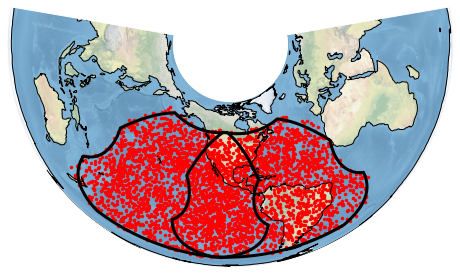

In [14]:
import matplotlib.pyplot as plt
bdf = BolideDataFrame()
bdf.plot_detections()
plt.show()

If you are familiar with matplotlib syntax, all of the same sorts of things work. Here is an example taking advantage of matplotlib:

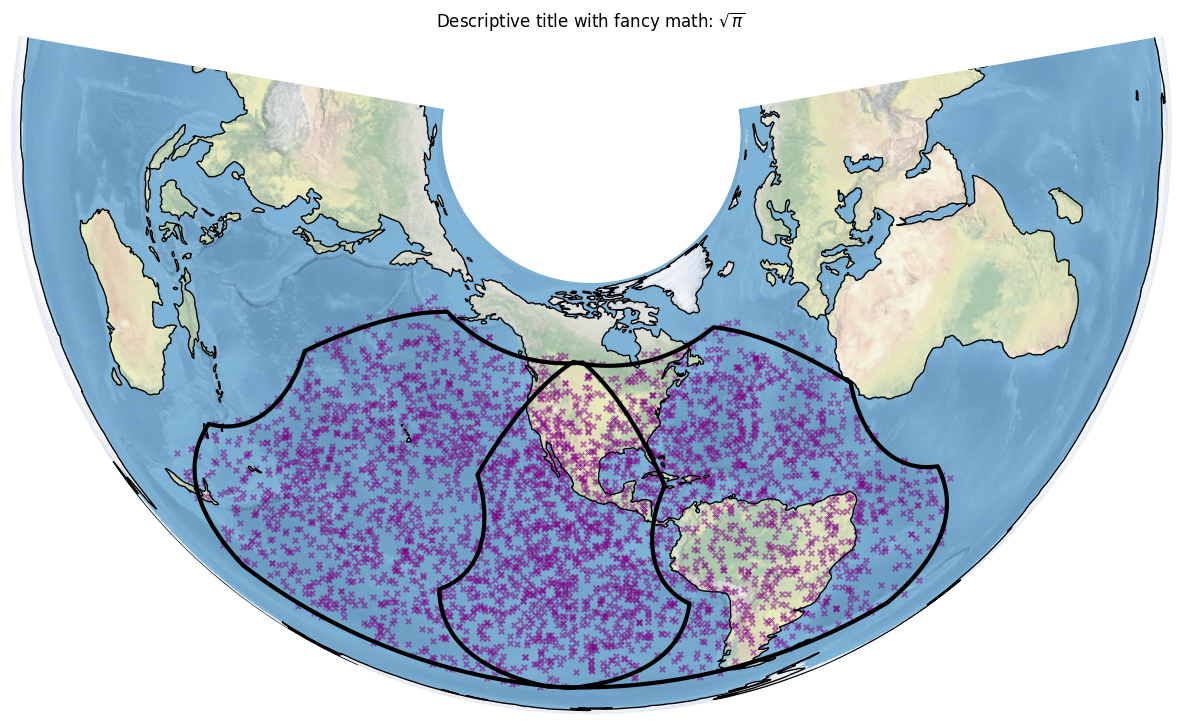

In [15]:
fig, ax = bdf.plot_detections(marker='x', alpha=0.5, color='purple', s=15)
fig.set_size_inches(15, 9)  # make the figure bigger
plt.title('Descriptive title with fancy math: $\sqrt{\pi}$')  # add a title
plt.savefig('descriptive-filename.png', dpi=300, bbox_inches='tight')  # save to disk
plt.show()

[Here](https://matplotlib.org/stable/tutorials/index.html) are some good tutorials on matplotlib.

If we only want to plot detections by GLM-17 and thus only really need the GOES-West position field-of-view boundary, we can do that as follows below. Note how we can filter and plot in the same line.

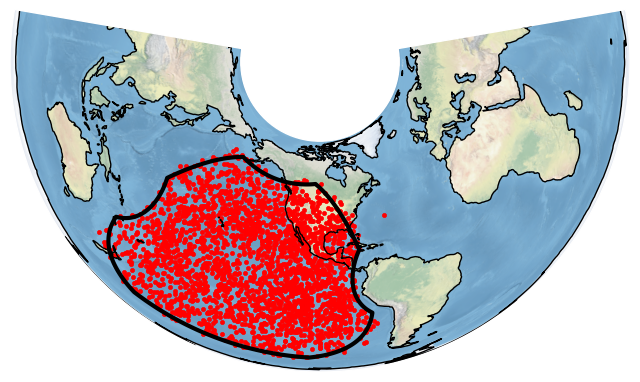

In [16]:
bdf[bdf.detectedBy.str.contains('GLM-17')].plot_detections(boundary=['goes-w'])
plt.show()

This shows us an interesting point in the Atlantic outside of the GOES-West GLM field-of-view. This is from when GOES-17 was not yet in the GOES-West position.

What if we don't like this map projection? `plot_detections` can accept any map projection in the form of a Cartopy CoordinateReferenceSystem object in the `crs` argument. Here is a map roughly from the perspective of GOES-16:

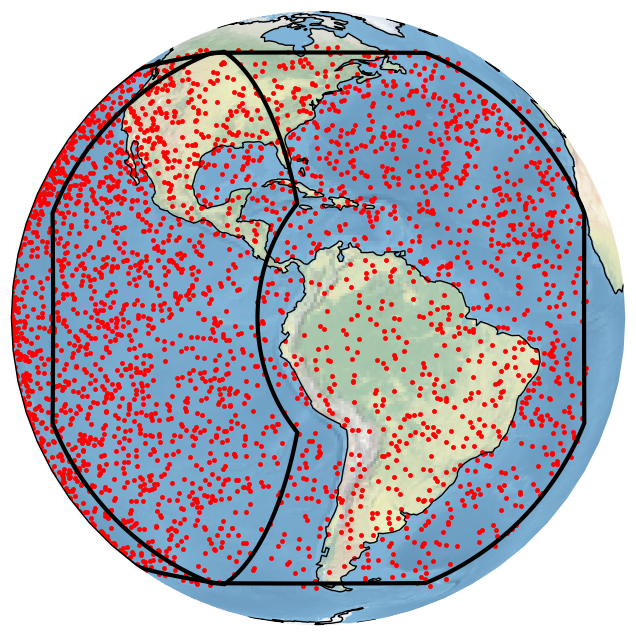

In [17]:
import cartopy.crs as ccrs
crs = ccrs.Geostationary(central_longitude = -75.2)
bdf.plot_detections(crs=crs)
plt.show()

[Here](https://scitools.org.uk/cartopy/docs/latest/reference/crs.html) is the documentation on CoordinateReferenceSystem objects, and [here](https://scitools.org.uk/cartopy/docs/latest/reference/projections.html) is a handy list of built-in projections. If you are really into map projections you can get some projections defined by an EPSG code using `ccrs.epsg`. Here is an example on the US National Atlas Equal Area projection (EPSG:2163):

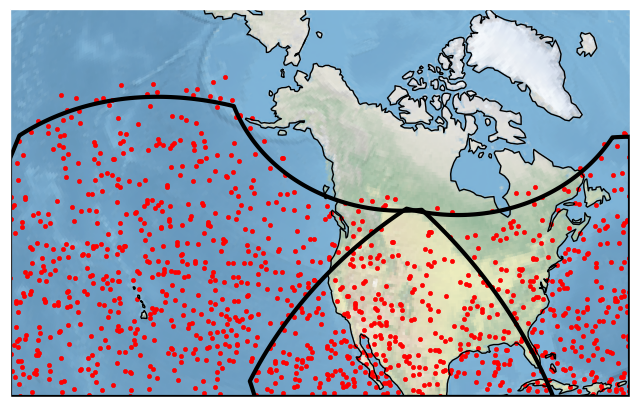

In [18]:
crs = ccrs.epsg(2163)
bdf.plot_detections(crs=crs)
plt.show()

In the examples above, it would be nice to see which bolides were detected by which satellite. `plot_detections` handles automatic coloring of categorical data when a column name is passed in:

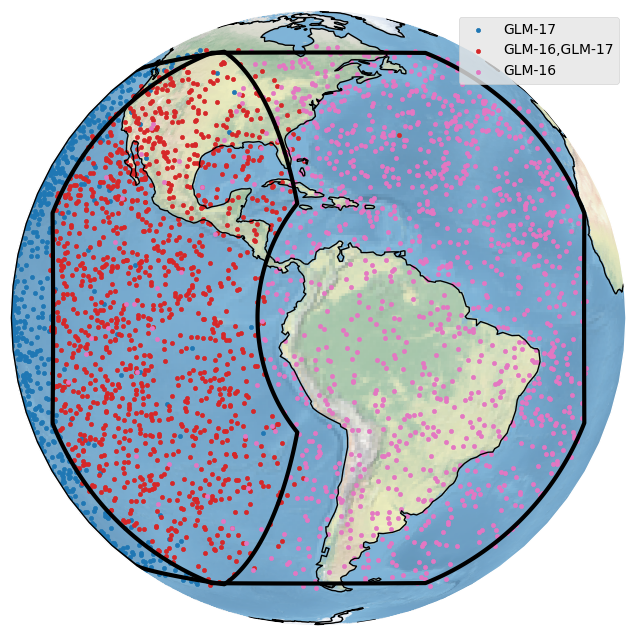

In [19]:
crs = ccrs.Geostationary(central_longitude = -75.2)
bdf.plot_detections(crs=crs, category='detectedBy')
plt.show()

Neat. We can also plot quantitative data:

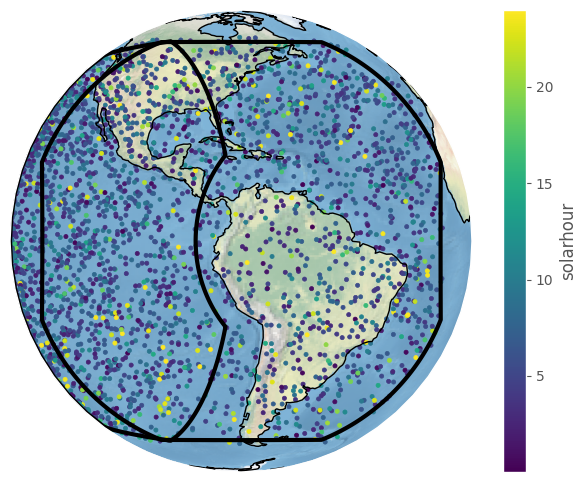

In [20]:
crs = ccrs.Geostationary(central_longitude = -75.2)
fig, ax = bdf.plot_detections(crs=crs, c=bdf.solarhour)
fig.set_size_inches(8,6)
plt.show()

The `BolideDataFrame` class is technically a subclass of the `GeoDataFrame` class from GeoPandas, so if you are familiar with it you can use their plotting methods too (see [here](https://geopandas.org/en/stable/docs/user_guide/mapping.html)).

# Other plots

One useful visualization is the number of bolides detected at different dates. The `plot_dates` method handles this.

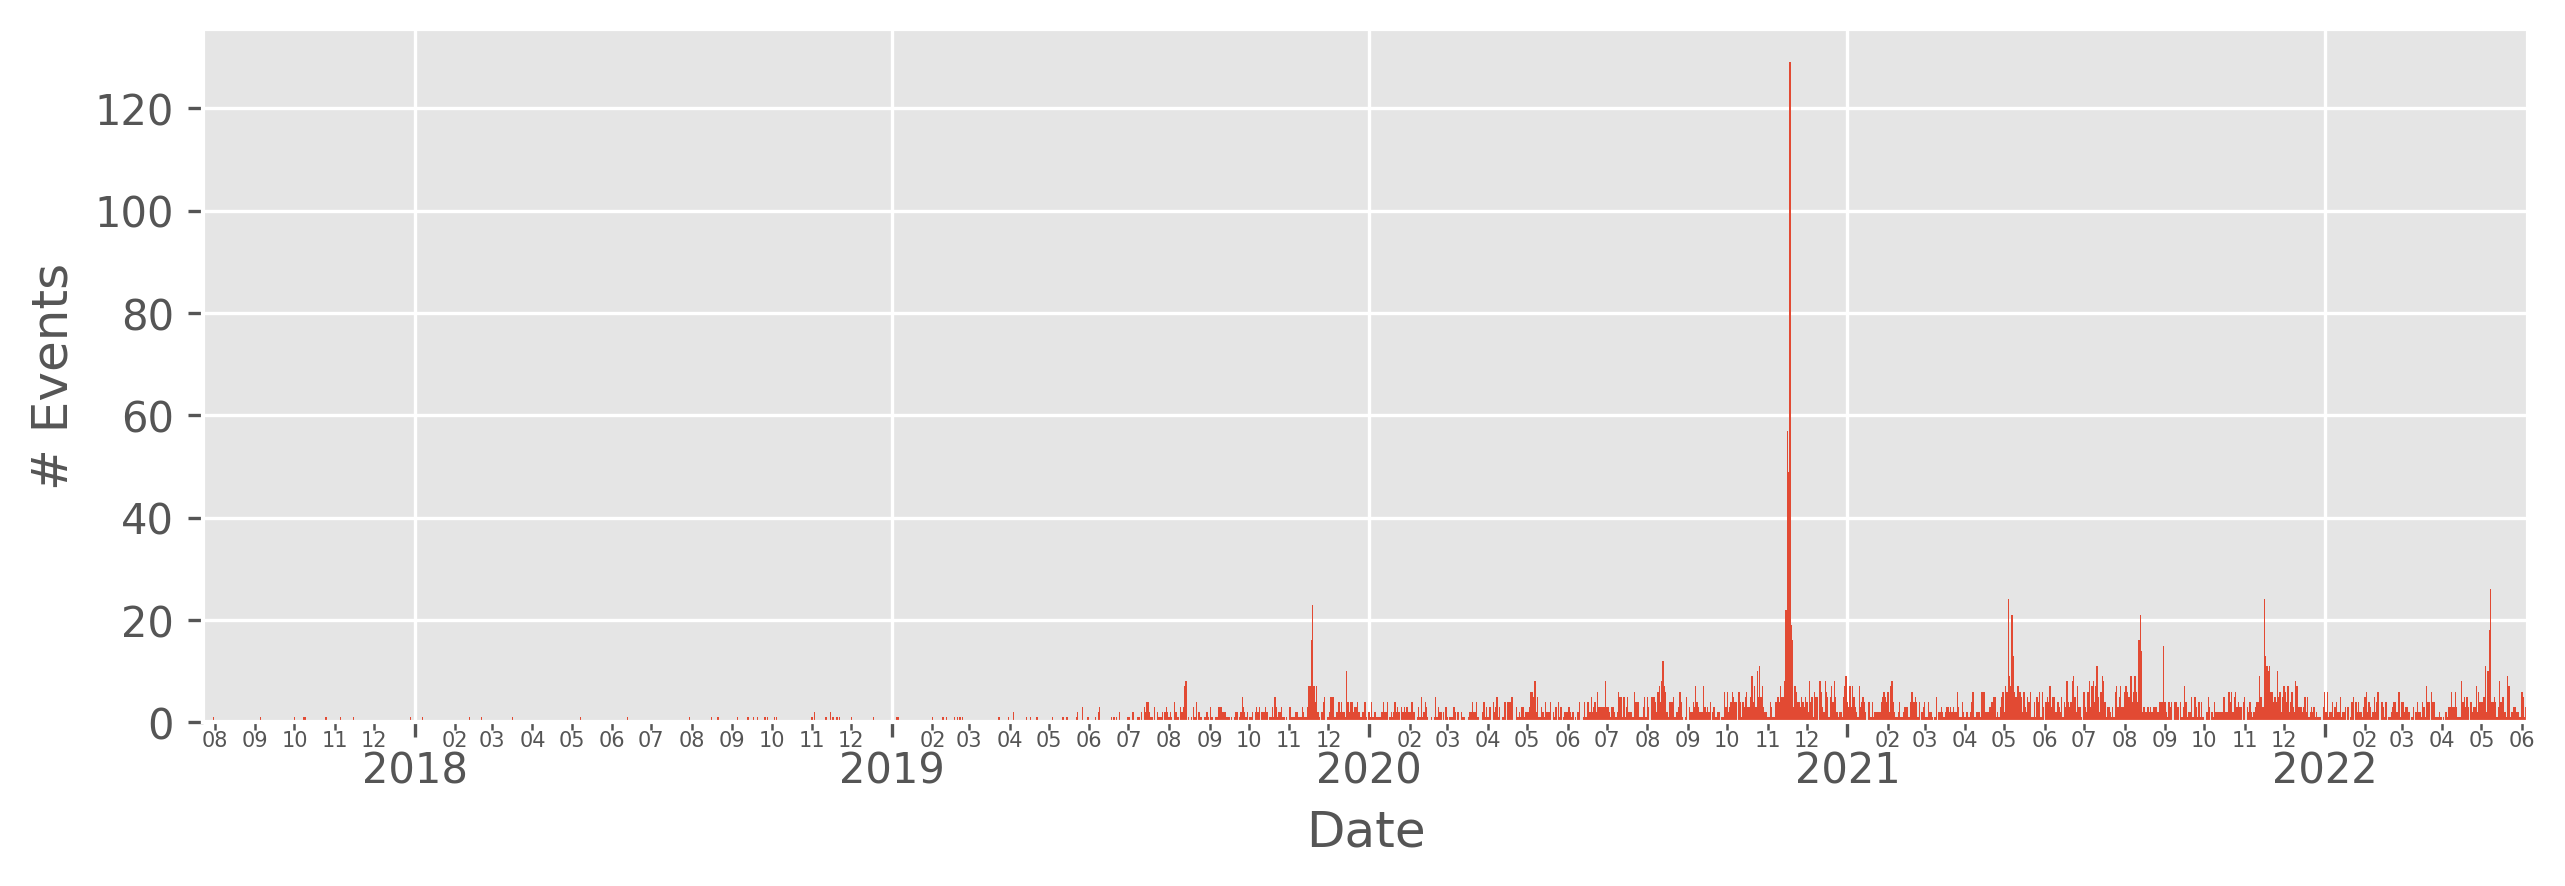

In [21]:
bdf.plot_dates()
plt.show()

Similar to `plot_detections`, regular matplotlib syntax works. If we are unhappy with the default style used by `bolides`, (ggplot), we can also pass in any [matplotlib style](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html) into the style argument (This also works for `plot_detections`).

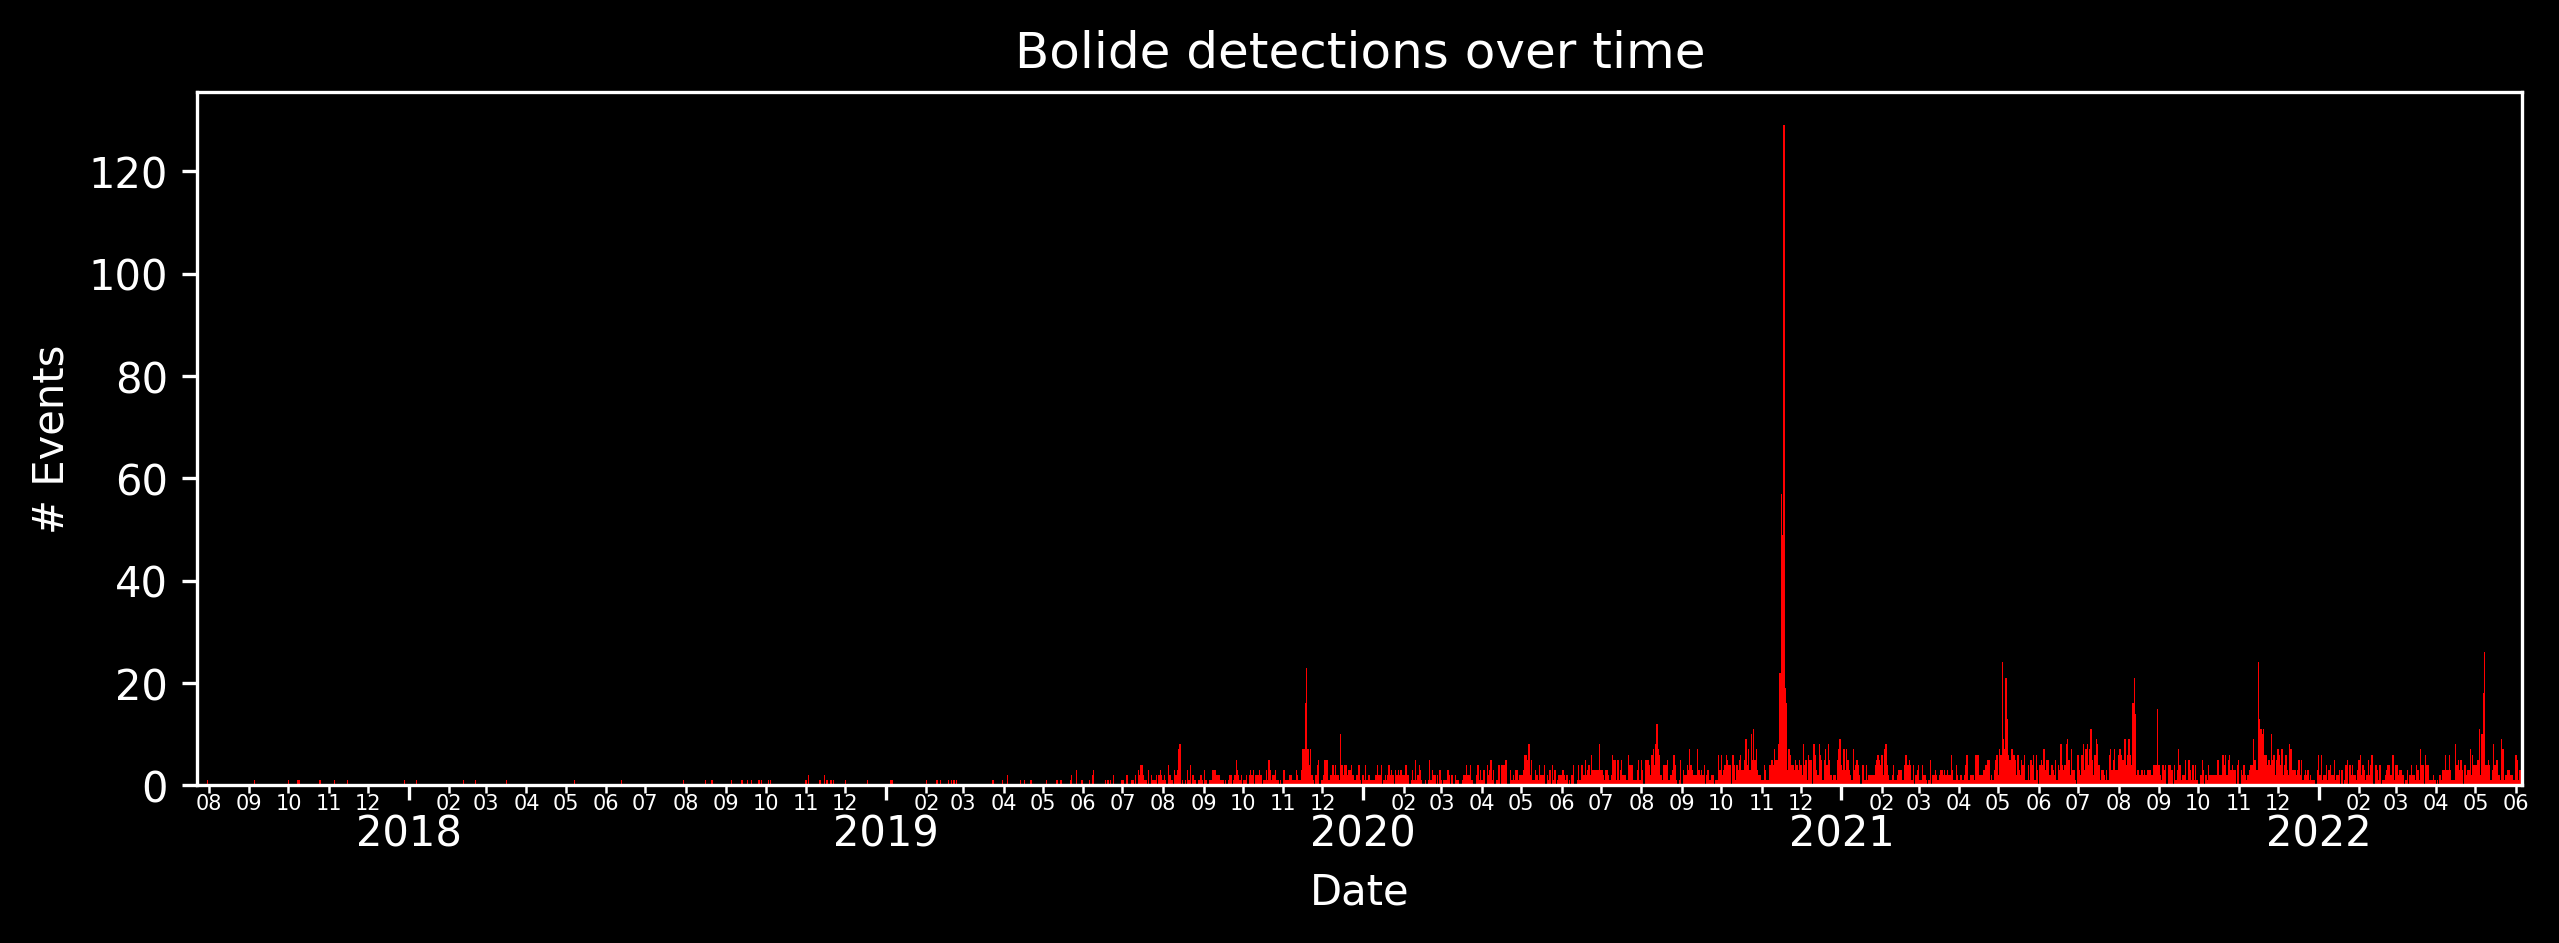

In [22]:
bdf.plot_dates(color='red', style='dark_background')
plt.title('Bolide detections over time')
plt.show()

 `plot_dates` also has a built-in date filter that works similarly to `filter_date`, and the frequency of the binning can be specified in the `freq` argument. The argument can take strings like "4D", "1Y", "3M", and so on. Similar to `plot_detections`, we can also filter and plot in the same line.

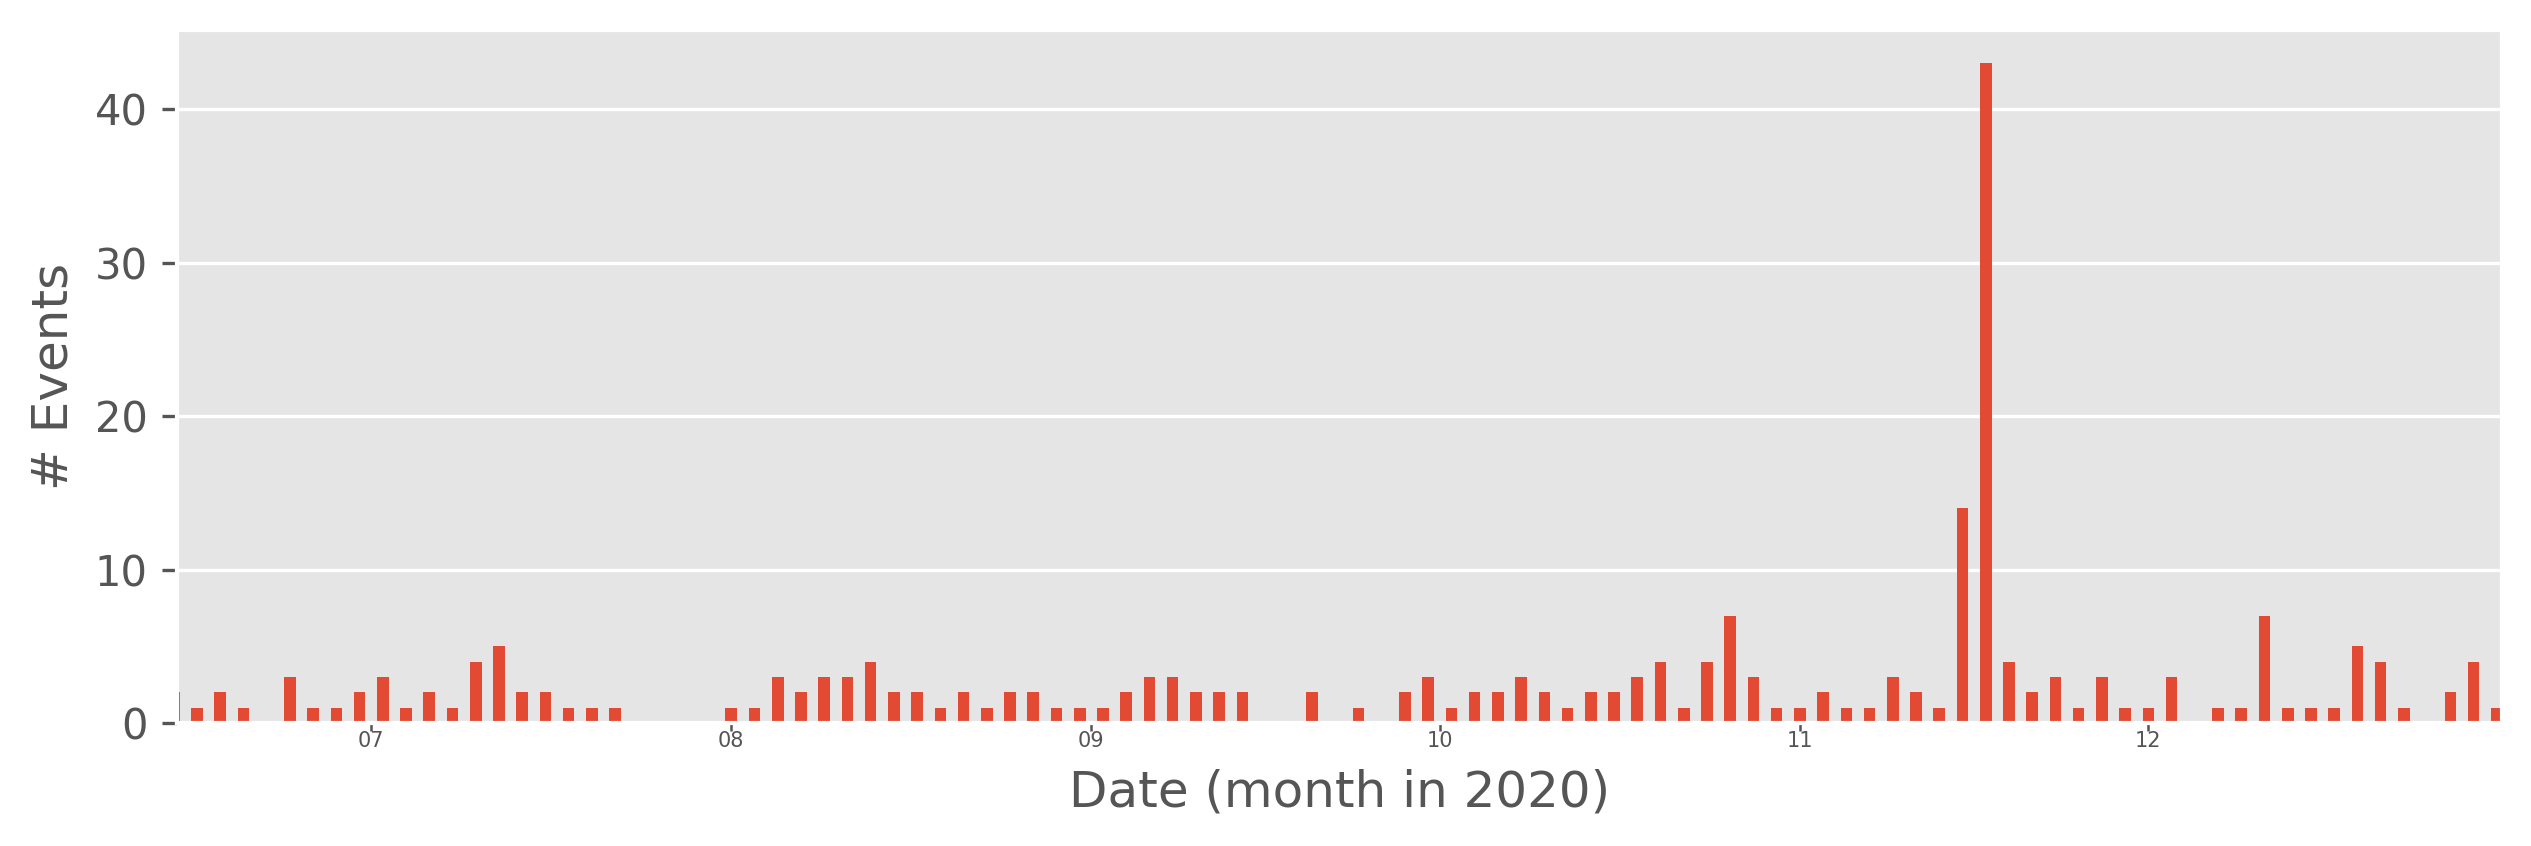

In [23]:
bdf[bdf.solarhour<4].plot_dates(freq="2D", start="2020-06-13", end="2021-01-01")
plt.show()

# Light curves

We also have data on bolide light curves, which can be interesting to look at. Let's first filter a small set of bolides to download light curves for:

In [24]:
bdf = BolideDataFrame()
bdf = bdf.filter_date(start='2022-06-01',end='2022-06-13')

Now we need to pull some data from the website:

In [25]:
bdf.add_website_data()

Exciting. Now we can plot light curves by accessing the `lightcurves` column

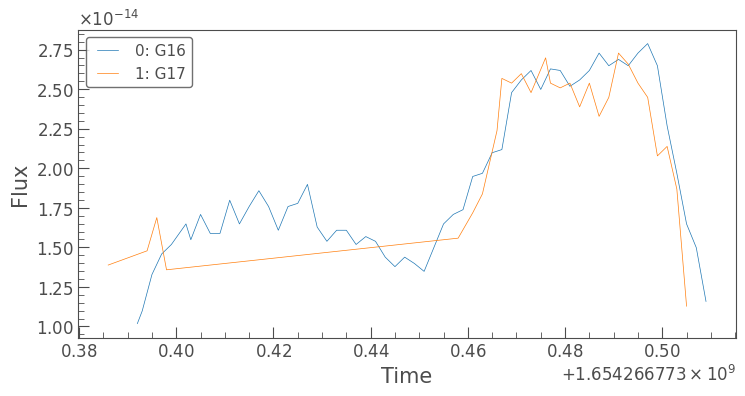

In [26]:
bdf.lightcurves[6].plot()
plt.show()

All of this is handled by the [lightkurve](http://docs.lightkurve.org/) package. The plots work similarly to `plot_detections` and `plot_dates` in that we can pass in regular matplotlib arguments.

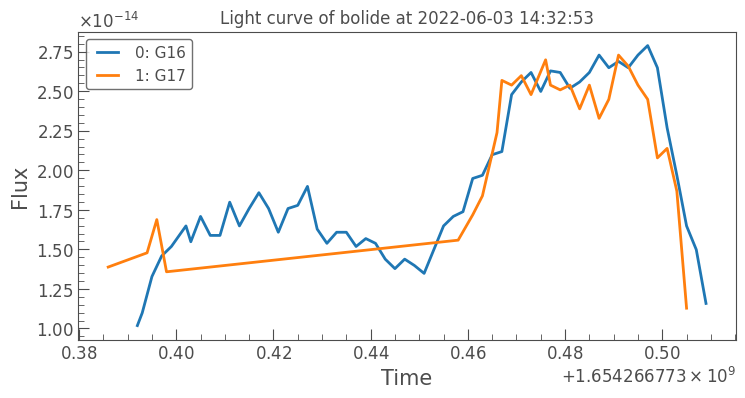

In [27]:
bdf.lightcurves[6].plot(linewidth=2)
plt.title('Light curve of bolide at '+str(bdf.datetime[6]))
plt.savefig(bdf._id[6] + '.png', dpi=300, bbox_inches='tight')
plt.show()